In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import geopandas as gp
import pycountry

import sys

sys.path.insert(0, "../Notebooks/Functions")
from StatsFunctions import MyFunctions as MF

In [2]:
DF = pd.read_csv("../Data/avgIQpercountry.csv")

In [3]:
#Renamed for easier access
DF.rename(
    {
        "Average IQ": "IQ",
        "Literacy Rate": "Literacy",
        "Nobel Prices": "Nobels",
        "HDI (2021)": "HDI",
        "Mean years of schooling - 2021": "SchoolYears",
        " GNI - 2021": "GNI",
        "Population - 2023": "Population",
    },
    axis=1,
    inplace=True,
)

In [4]:
DF = DF.astype({"Population": "float64"})

In [5]:
order = DF["Country"].copy().to_list()
colours = dict(zip(DF["Continent"].unique(), sns.color_palette("Paired")))
kwargs = {"hue": "Continent", "palette": colours, "edgecolor": "black", "alpha": 0.8}
# At a very late stage made a colour pallete for continents only

In [47]:
DF.dropna(how='any', inplace=True)

In [6]:
#wanted to see if group by will be useful, but seaborn does it for me already
Continents = DF.groupby("Continent").agg(
    {"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"}
)

In [7]:
#Thought might use later
less_10 = (
    DF.query("Population < 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
    .sum()
)
over_10 = (
    DF.query("Population > 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
)

In [8]:
#Not significant
fig = px.sunburst(
    DF.query("Population > 50_000_000"),
    path=["Continent", "Country"],
    values="Population",
    width=1000,
    height=600,
    title="Countries by population",
)
fig.show()

In [9]:
def heatmap(data, title=""):
    corr = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(corr.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=45)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)

    matrix = pd.DataFrame(data.corr(method="pearson")).round(2)
    
    for i in range(len(matrix)):
        for j in range(len(matrix.iloc[0])):
            text = ax.text(j, i, matrix.iloc[i, j], ha="center", va="center", color="w")
    ax.set_title(title, pad=20)


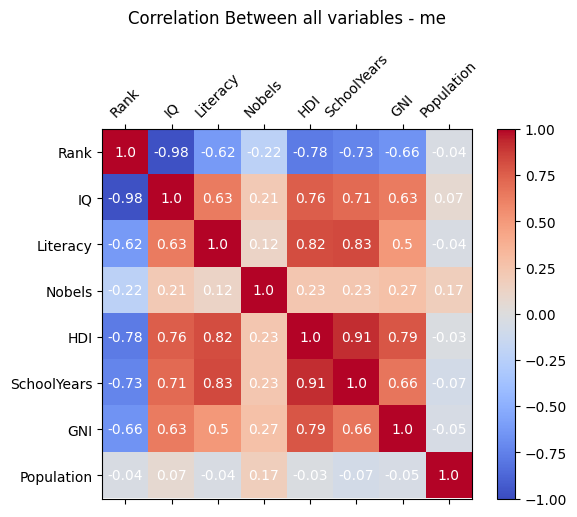

In [10]:
heatmap(
    DF.select_dtypes(include=np.number),
    title="Correlation Between all variables - me",
)

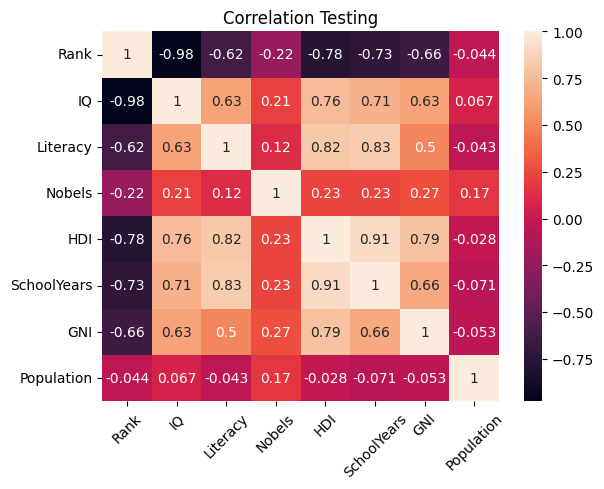

In [11]:
#decided to see pmcc between all variables quickly -> a lot of dependent variables -> need to check per continent
sns.heatmap(
    DF.select_dtypes(include=np.number).corr(method="pearson"), annot=True
)  # tk change heatmap for my example
plt.title("Correlation Testing")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of average IQ')

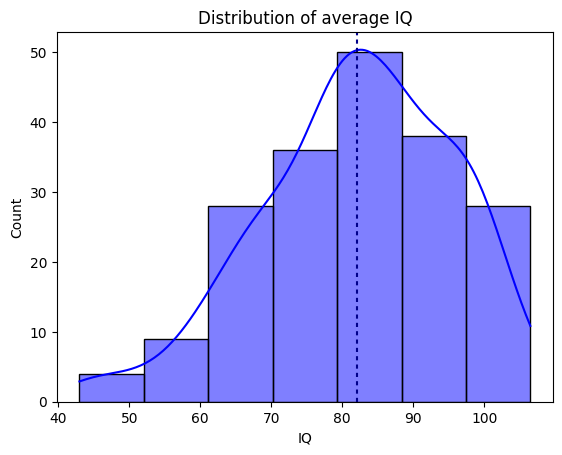

In [12]:
# decided to check average IQ and see how useful it would be
histIQ = sns.histplot(DF, x="IQ", bins=7, kde=True, color="blue")

plt.axvline(
    MF.mean(DF["IQ"]), color="darkblue", label="mean", dashes=(2, 2)
)  # TK change mean to my function

plt.title("Distribution of average IQ")

KeyboardInterrupt: 

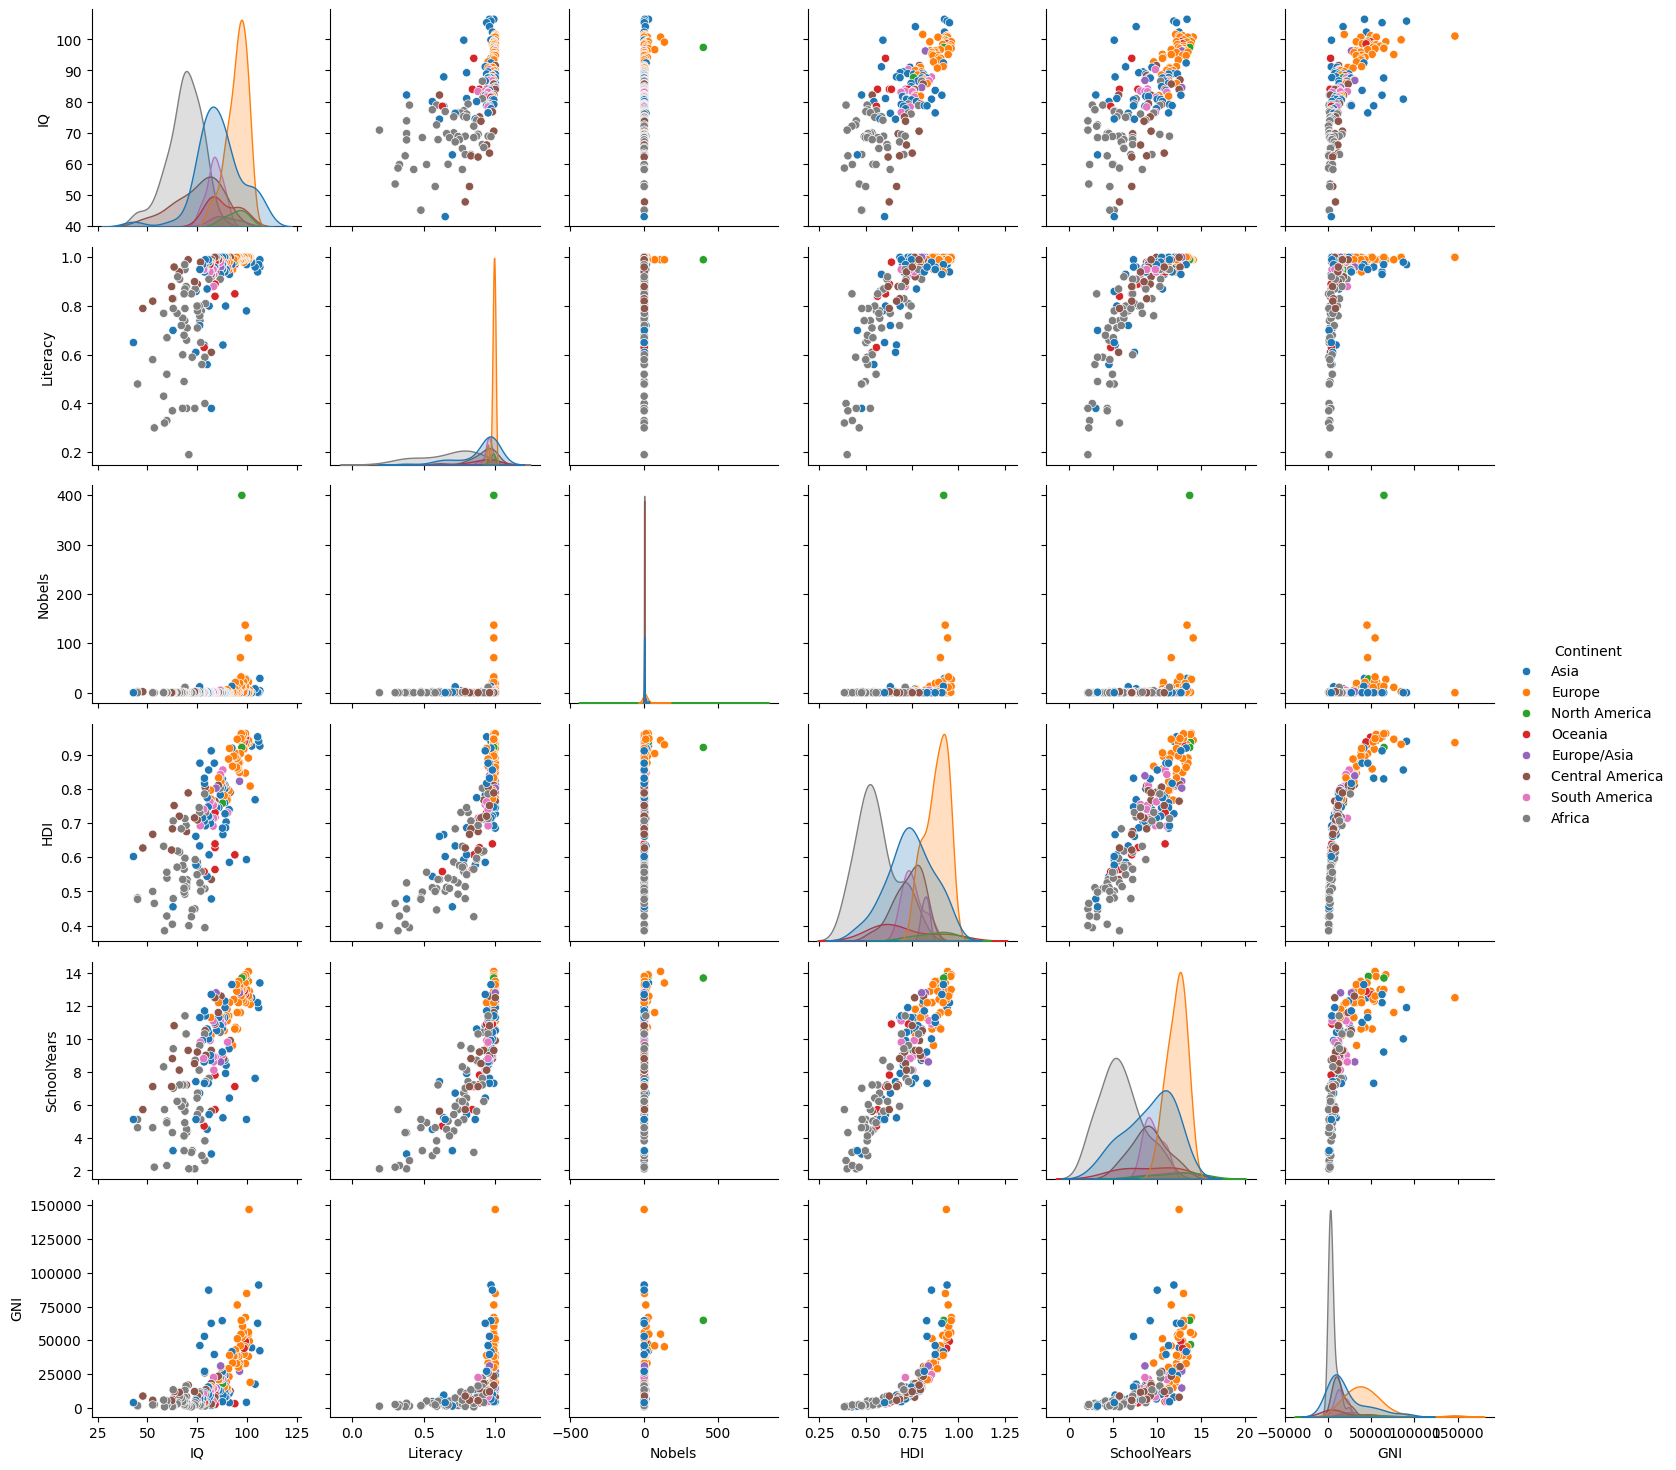

In [14]:
# #Won't go in final, just to see quickly if I can use something
# sns.pairplot(
#     DF[
#         [
#             "IQ",
#             "Literacy",
#             "Nobels",
#             "HDI",
#             "Continent",
#             "SchoolYears",
#             "GNI",
#         ]
#     ],
#     hue = "Continent"
    
# )

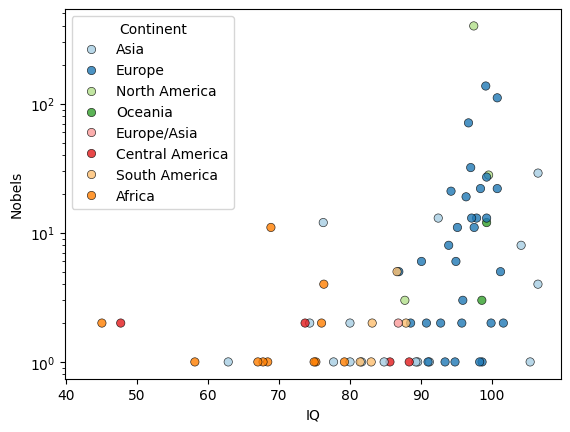

In [15]:
# Desided exprlore correlation between average IQ of a country with how many novel prises the continent won.
# Europe is on average smarter and have more entries due to more countries, but America is a clear outlier
# sns.scatterplot(data=DF, x="IQ", y="Nobels", hue="Continent", palette=colours, edgecolor = "black", alpha = 0.5)
sns.scatterplot(data=DF, x="IQ", y="Nobels", **kwargs)

plt.yscale("log")

Text(0.5, 1.0, 'Distribution of IQ for each continent')

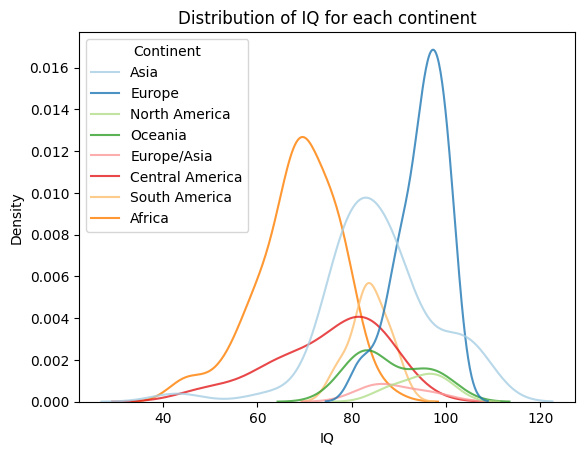

In [16]:
sns.kdeplot(data=DF, x="IQ", **{i:kwargs[i] for i in kwargs if i!='edgecolor'})
plt.title("Distribution of IQ for each continent")

Text(0.5, 1.0, 'Correlation between HDI and GNI')

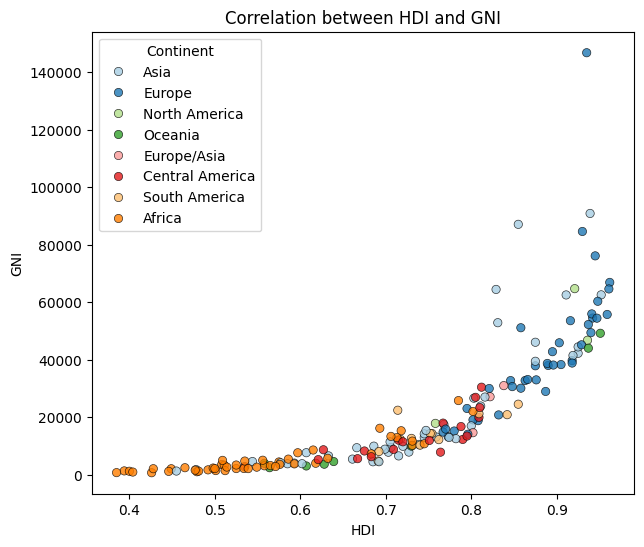

In [17]:
fig, ax = plt.subplots(figsize = (7,6))
sns.scatterplot(data=DF, y="GNI", x="HDI", **kwargs)  
plt.title("Correlation between HDI and GNI")

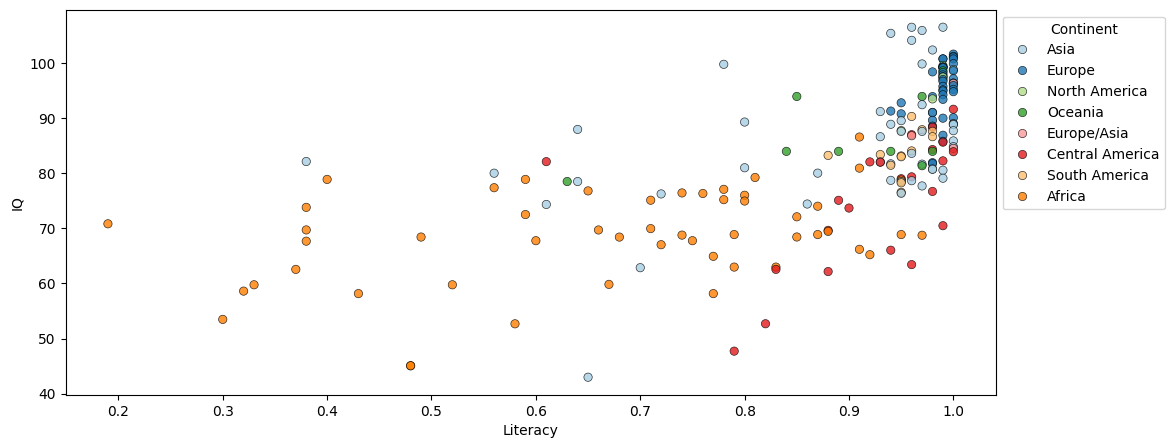

In [18]:
fig, ax = plt.subplots(figsize = (12,5))
sns.scatterplot(data=DF, y="IQ", x="Literacy", **kwargs)  #
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Text(0.5, 1.0, 'Distribution of IQ')

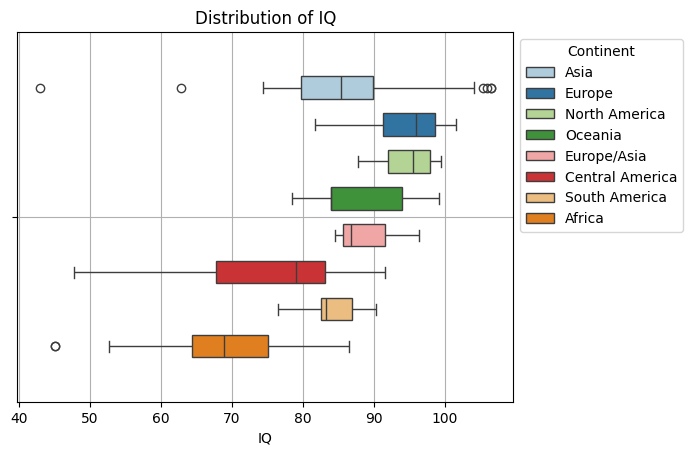

In [19]:
ax = sns.boxplot(data=DF, x="IQ",  gap=0.4, dodge=True, **{i:kwargs[i] for i in kwargs if i not in ['edgecolor', "alpha"]})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.title("Distribution of IQ")


Text(0.5, 1.0, 'Correlation between years spent in school and literacy rate')

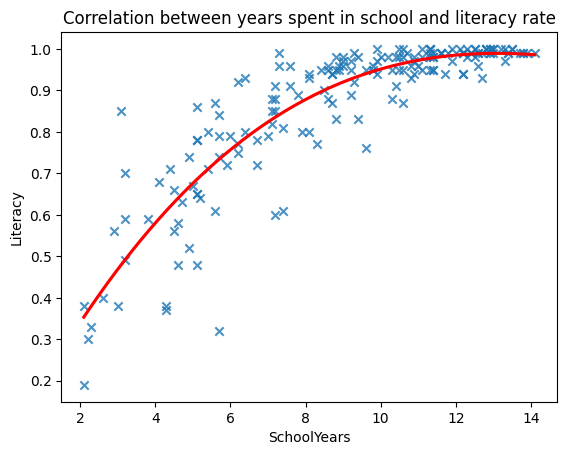

In [20]:
sns.regplot(DF, x = "SchoolYears", y = "Literacy", order=3, ci=0, marker="x", line_kws=dict(color="r")) #TK: come up with own funciton???
plt.title("Correlation between years spent in school and literacy rate")


In [21]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


C:\Users\dima1\AppData\Local\Temp\ipykernel_30600\20647279.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [22]:
rank_location = DF[::]

world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
rank_location['ISO_alpha'] = rank_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)



C:\Users\dima1\AppData\Local\Temp\ipykernel_30600\1021141429.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\dima1\AppData\Local\Temp\ipykernel_30600\1021141429.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='SchoolYears',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='Average length of schooling in countries', title_x=0.5, autosize = True)


fig.show()

In [24]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='Literacy',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='Average literacy index of schooling in countries', title_x=0.5, autosize = True)


fig.show()

In [25]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='HDI',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='HDI index of schooling in countries', title_x=0.5, autosize = True)


fig.show()

In [26]:
DF

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2.773168e+06
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,1.809203e+07
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5.418377e+06
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8.791092e+06


Text(0.5, 1.0, 'Most populated counties')

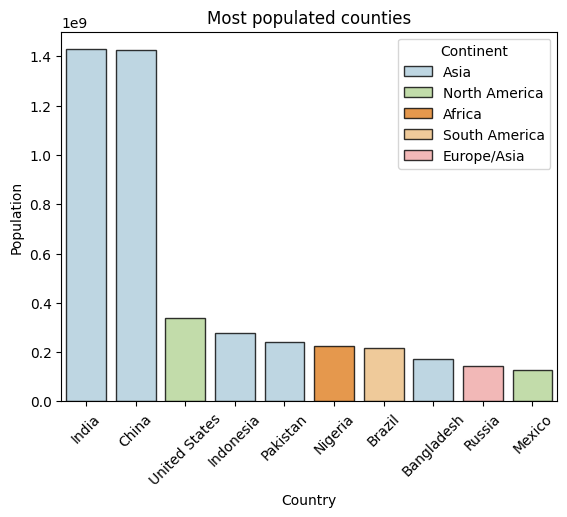

In [27]:
sns.barplot(DF.sort_values(by = "Population", ascending=False).head(10), x= "Country", y = "Population", **kwargs)
plt.xticks(rotation = 45)
plt.title("Most populated counties") #TK - not significant

In [56]:
def lin_reg(x: list, y: list):
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    print(111)
    # Calculate the means of x and y
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    print(111)
    
    
    # Calculate the slope (m) and intercept (b) using least squares method
    numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x)))
    denominator = sum((x[i] - mean_x) ** 2 for i in range(len(x)))
    print(111)
    
    # Avoid division by zero
    if denominator == 0:
        raise ValueError(
            "The denominator in the slope calculation is zero. Cannot perform linear regression."
        )

    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept

pandas.core.series.Series

<Axes: xlabel='HDI', ylabel='IQ'>

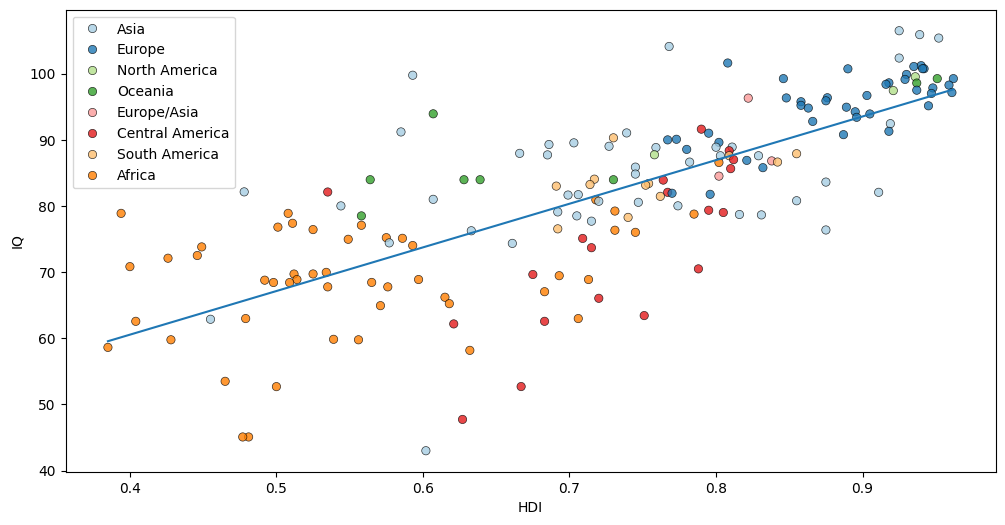

In [81]:
m,q = MF.linear_regression(DF["HDI"].to_list(), DF["IQ"].to_list())

fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data = DF, x = "HDI", y = "IQ", **kwargs)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.lineplot(x = DF["HDI"], y = m * DF["HDI"] + q)


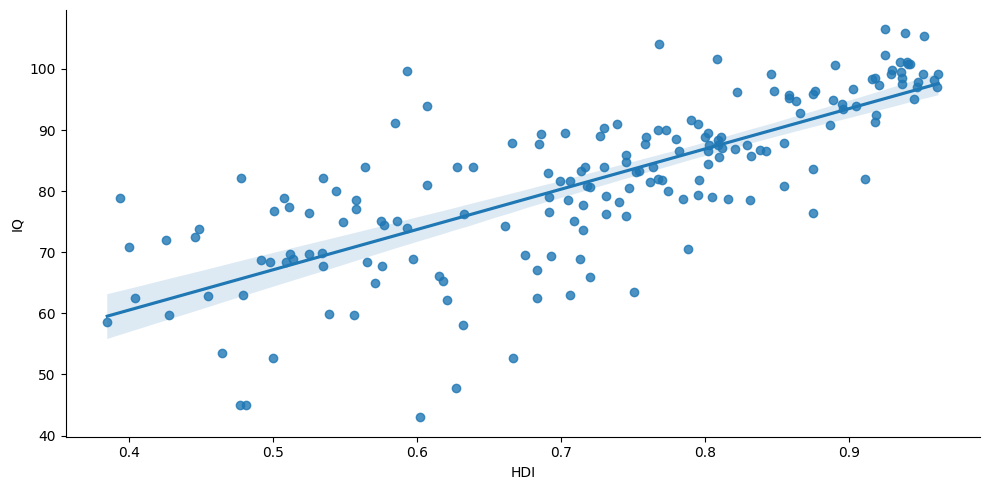

In [30]:
sns.lmplot(DF, x = "HDI", y = "IQ", aspect=2)

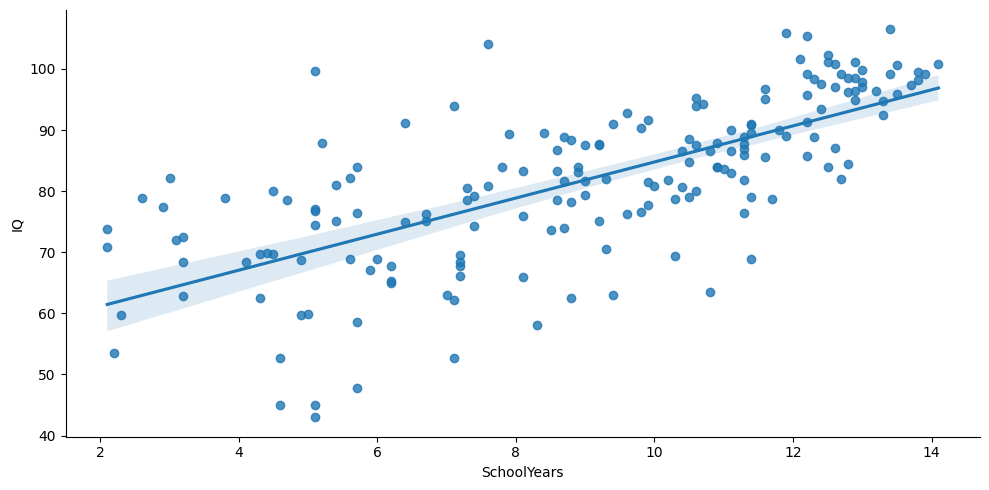

In [31]:
sns.lmplot(DF, x = "SchoolYears", y = "IQ", aspect=2)


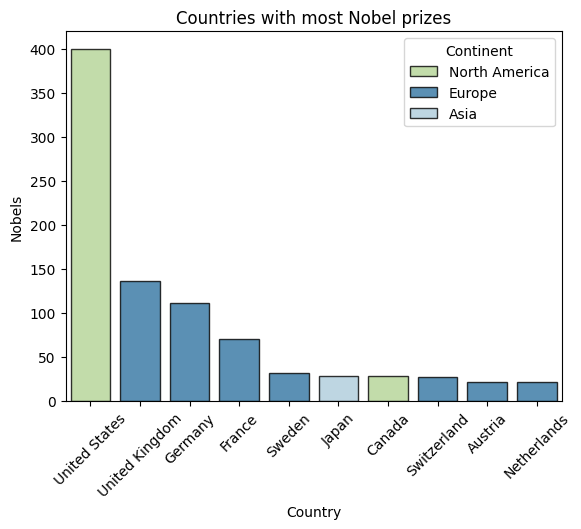

In [32]:
sns.barplot(DF.query("Nobels > 0").sort_values(by  = "Nobels", ascending=False).head(10), x = "Country", y = "Nobels",**kwargs)
plt.xticks(rotation = 45)
plt.title("Countries with most Nobel prizes")
plt.show()